# Solving Equations by Fixed Point Iteration (of Contraction Mappings)

**References:**
- Section 1.2 of [Sauer](../references.html#sauer)
- Section 2.2 of [Burden&Faires](../references.html#Burden-Faires)

## Introduction

in the next section we will meet [Newton's Method](newtons-method.ipynb)
for root-finding, which you might have seen in a calculus course.
This is one very important example of a more general strategy of **fixed-point iteration**, so we start with that.

In [22]:
# Enable graphics, basically with the Python package matplotlib.pyplot
using PyPlot

# Enable LaTeX math formatting in text strings, e.g. L"y=x^2"
using LaTeXStrings

In [23]:
n_plot_points = 50;

## Fixed-point equations

A variant of stating equations as *root-finding* ($f(x) = 0$) is *fixed-point* form:
given a function $g:\mathbb{R} \to \mathbb{R}$ or $g:\mathbb{C} \to \mathbb{C}$
(or even $g:\mathbb{R}^n \to \mathbb{R}^n$; a later topic),
find a *fixed point* of $g$.
That is, a value $p$ for its argument such that

$$g(p) = p$$

Such problems are interchangeable with root-finding.
One way to convert from $f(x) = 0$ to $g(x) = x$ is functionining

$$g(x) := x - w(x) f(x)$$

for any "weight function" $w(x)$.

One can convert the other way too, for example functionining $f(x) := g(x) - x$.
We have already seen this when we converted the equation $x = \cos x$ to $f(x) = x - \cos x = 0$.

Compare the two setups graphically: in each case, the $x$ value at the intersection of the two curves is the solution we seek.

In [24]:
function f_1(x)
    return x - cos.(x)
end;
function g_1(x)
    return cos.(x)
end;

In [25]:
a = -1;
b = 1;
x = range(a, b, length=n_plot_points);

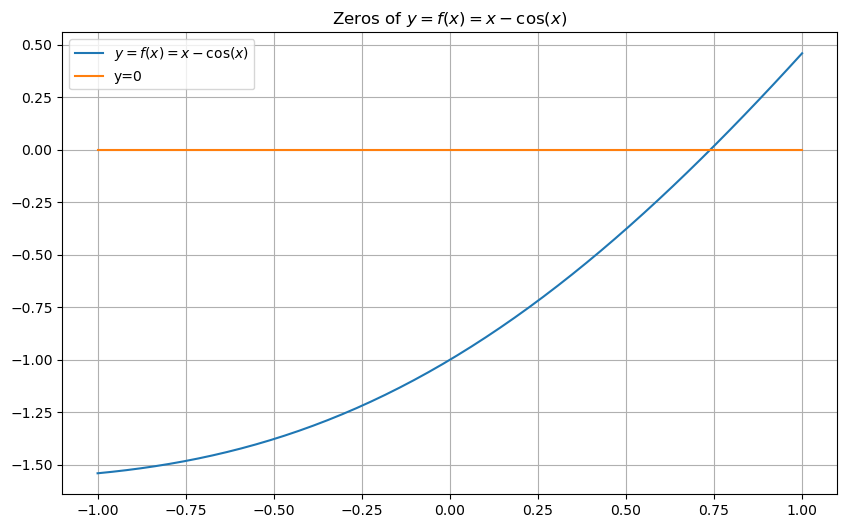

In [26]:
figure(figsize=[10,6])
title(L"Zeros of $y = f(x) = x - \cos(x)$")
plot(x, f_1(x), label=L"y = f(x) = x - \cos(x)")
plot([a, b], [0, 0], label="y=0")
legend()
grid(true)

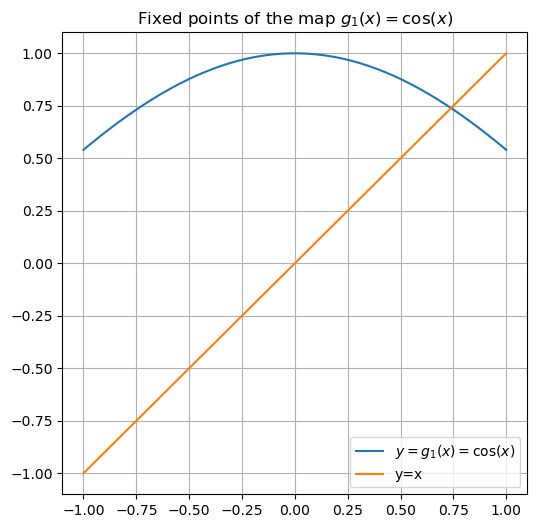

In [27]:
figure(figsize=[6,6])
title(L"Fixed points of the map $g_1(x) = \cos(x)$")
plot(x, g_1(x), label=L"y = g_1(x) = \cos(x)")
plot(x, x, label="y=x")
legend()
grid(true);

The fixed point form can be convenient partly because we almost always have to solve by successive approximations,
or *iteration*, and fixed point form suggests _one_ choice of iterative procedure:
start with any first approximation $x_0$, and iterate with

$$
x_1 = g(x_0), \, x_2 = g(x_1), \dots, x_{k+1} = g(x_k), \dots
$$

**Proposition 1.**
If $g$ is continuous, and **if** the above sequence $\{x_0, x_1, \dots \}$ converges to a limit $p$, then that limit is a fixed point of function $g$: $g(p) = p$.

**Proof:**
*From $\displaystyle \lim_{k \to \infty} x_k = p$, continuity gives*

$$\lim_{k \to \infty} g(x_k) = g(p).$$

*On the other hand, $g(x_k) = x_{k+1}$, so*

$$\lim_{k \to \infty} g(x_k) = \lim_{k \to \infty} x_{k+1} = p.$$

*Comparing gives $g(p) = p$.*

That second "i" is a big one.
Fortunately, it can often be resolved using the idea of a *contraction mapping*.

**functioniniton 1: Mapping.**
A function $g(x)$ functionined on a closed interval $D = [a, b]$ which sends values back into that interval,
$g: D \to D$, is sometimes called a *map* or *mapping*.

(*Aside:* The same applies for a function $g: D \to D$ where $D$ is a subset of the complex numbers,
or even of vectors $\mathbb{R}^n$ or $\mathbb{C}^n$.)

A mapping is sometimes thought of as moving a region $S$ within its domain $D$ to another such region, by moving each point
$x \in S \subset D$
to its image
$g(x) \in g(S) \subset D$.

A very important case is mappings that shrink the region, by reducing the distance between points:

**Proposition 2:**
Any continuous mapping on a closed interval $[a, b]$ has at least one fixed point.

**Proof:**
*Consider the "root-finding cousin", $f(x) = x - g(x)$.*

*First, $f(a) = a - g(a) \leq 0$, since $g(a) \geq a$ so as to be in the domain $[a,b]$ — similarly, $f(b) = b - g(b) \geq 0$.*

*From the Intermediate Value Theorem, $f$ has a zero $p$, where $f(p) = p - g(p) = 0$.*

*In other words, the graph of $y=g(x)$ goes from being above the line $y=x$ at $x=a$ to below it at $x=b$,
so at some point $x=p$, the curves meet: $y = x = p$ and $y = g(p)$, so $p = g(p)$.*

### Example 1

Let us illustrate this with the mapping $g_4(x) := 4 \cos x$,
for which the fact that $|g_4(x)| \leq 4$ ensures that this is a map of the domain $D = [-4, 4]$ into itself:

In [28]:
function g_4(x)
    return 4 * cos.(x)
end
a = -4;
b = 4;

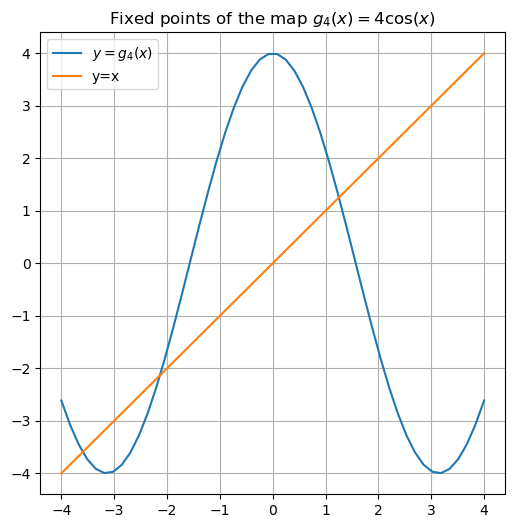

In [29]:
x = range(a, b, length=n_plot_points);
figure(figsize=[6,6])
title(L"Fixed points of the map $g_4(x) = 4 \cos(x)$")
plot(x, g_4(x), label=L"y = g_4(x)")
plot(x, x, label="y=x")
legend()
grid(true);

This example has multiple fixed points (three of them).
To ensure both the existence of a **unique** solution, and covergence of the iteration to that solution, we need an extra condition.

**Definition 2: Contraction Mapping**.
A mapping $g:D \to D$, is called a *contraction* or *contraction mapping* if there is a constant $C < 1$ such that

$$|g(x) - g(y)| \leq C |x - y|$$

for any $x$ and $y$ in $D$.
We then call $C$ a *contraction constant*.

(*Aside:* The same applies for a domain in $\mathbb{R}^n$: just replace the absolute value $| \dots |$ by the vector norm
$\| \dots \|$.)

**Note:** it is not enough to have $| g(x) - g(y) | < | x - y |$ or $C = 1$!
We need the ratio
$\displaystyle \frac{|g(x) - g(y)|}{|x - y|}$
to be *uniformly* less than one for all possible values of $x$ and $y$.

**Theorem 1 (A Contraction Mapping Theorem).**
Any contraction mapping on a closed, bounded interval $D = [a, b]$ has exactly one fixed point $p$ in $D$.
Further, this can be calculated as the limit $\displaystyle p = \lim_{k \to \infty} x_k$ of the iteration sequence given by $x_{k+1} = g(x_{k})$ for *any* choice of the starting point $x_{0} \in D$.

**Proof:**
*The main idea of the proof can be shown with the help of a few pictures.
<br>
First, uniqeness:
between any two of the multiple fixed points above — call them $p_0$ and $p_1$ — the graph of $g(x)$ has to rise with secant slope 1: $(g(p_1) - g(p_0)/(p_1 - p_0) = (p_1 - p_0)/(p_1 - p_0) = 1$, and this violates the contraction property.*

*So instead, for a contraction, the graph of a contraction map looks like the one below for our favorite example,
$g(x) = \cos x$ (which we will soon verify to be a contraction on interval $[-1, 1]$):*

The second claim, about **convergence** to the fixed point from any initial approximation $x_0$,
will be verified below, once we have seen some ideas about measuring errors.

### An easy way of checking whether a differentiable function is a contraction

With differentiable functions, the contraction condition can often be easily verified using derivatives:

**Theorem 2 (A derivative-based fixed point theorem).**
If a function $g:[a,b] \to [a,b]$ is differentiable and there is a constant $C < 1$ such that $|g"(x)| \leq C$ for all $x \in [a, b]$, then $g$ is a contraction mapping, and so has a unique fixed point in this interval.

**Proof:**
*Using the Mean Value Theorem, $g(x) - g(y) = g"(c)(x - y)$ for some $c$ between $x$ and $y$;
<br>
then taking absolute values,*

$$|g(x) - g(y)| = |g"(c)|
\cdot |(x - y)| \leq C |(x - y)|.$$

### Example 2. $g(x) = \cos x$ is a contraction on domain $[-1, 1]$

Our favorite example $g(x) = \cos(x)$ is a contraction, but we have to be a bit careful about the domain.

For all real $x$, $g"(x) = -\sin x$, so $|g"(x)| \leq 1$; this is almost but not quite enough.

However, we have seen that iteration values will settle in the interval $D = [-1,1]$,
and considering $g$ as a mapping of this domain,
$|g"(x)| \leq \sin(1) = 0.841\dots < 1$: that is, now we have a contraction, with $C = \sin(1) \approx 0.841$.

And as seen in the graph above, there is indeed a unique fixed point.

### The contraction constant $C$ as a measure of how fast the approximations improve (the smaller the better)

It can be shown that if $C$ is small (at least when one looks only at a reduced domain $|x - p| < R$) then the convergence is "fast" once $|x_k - p| < R$.

To see this, we functionine some jargon for talking about errors.
(For more details on error concepts, see the section on
[Measures of Error and Convergence Rates](../markdown-notebooks/error-measures-convergence-rates.ipynb))

**Definition 3: Error**.
The *error* in $\tilde x$ as an approximation to an exact value $x$ is

$$\text{error} := \text{(approximation)} - \text{(exact value)} = \tilde x - x$$

This will often be abbreviated as $E$.

**Definition 4: Absolute Error.**
The *absolute error* in $\tilde x$ an approximation to an exact value $x$ is the magnitude of the error:
the absolute value $|E| = |\tilde x - x|$.

(*Aside:* This will later be extended to $x$ and $\tilde x$ being vectors,
by again using the vector norm in place of the absolute value.
In fact, I will sometimes blur the distinction by using the "single line" absolute value notation for vector norms too.)

In the case of $x_k$ as an approximation of $p$, we name the error $E_k := x_k - p$.
Then $C$ measures a worst case for how fast the error decreases as $k$ increases, and this is "exponentially fast":

**Proposition 3.**
$|E_{k+1}| \leq C |E_{k}|$, or $|E_{k+1}|/|E_{k}|\leq C$,
and so

$$|E_k| \leq C^k |x_0 - p|$$

That is, the error decreases at worst in a geometric sequence,
which is exponential decrease with respect to the variable $k$.

**Proof.**

*$E_{k+1} = x_{k+1} - p = g(x_{k}) - g(p)$, using $g(p) = p$.
Thus the contraction property gives*

$$|E_{k+1}| = |g(x_k) - g(p)| \leq C |x_k - p| = C |E_k|$$

*Applying this again,*

$$|E_k| \leq C |E_{k-1}| \leq C \cdot C |E_{k-2}| = C^2 |E_{k-2}|$$

*and repeating $k-2$ more times,*

$$|E_k|\leq  C^k |E_0| = C^k |x_0 - p|.$$

**Aside:** We will often use this "recursive" strategy of relating the error in one iterate to that in the previous iterate.

**The rest of the proof of the Contraction Mapping Theorem (Theorem 5): guaranteed convergence.**

*This now follows from the above proposition:
<br>
for* **any** *initial approximation $x_0$, we know that
$|E_k|\leq C^k |x_0 - p|$, and with $C < 1$, this can be made as small as we want by choosing a large enough value of $k$.
Thus*

$$\lim_{k \to \infty} |E_k| = \lim_{k \to \infty} |x_k - p| = 0,$$
*which is another way of saying that $\displaystyle \lim_{k \to \infty} x_k = p$, or $x_k \to p$, as claimed.*

### Example 3. Solving $x = \cos x$ with a naive fixed point iteration

We have seen that _one_ way to convert the example
$f(x) = x - \cos x = 0$ to a fixed point iteration is $g(x) = \cos x$,
and that this is a contraction on $D = [-1, 1]$

Here is what this iteration looks like:

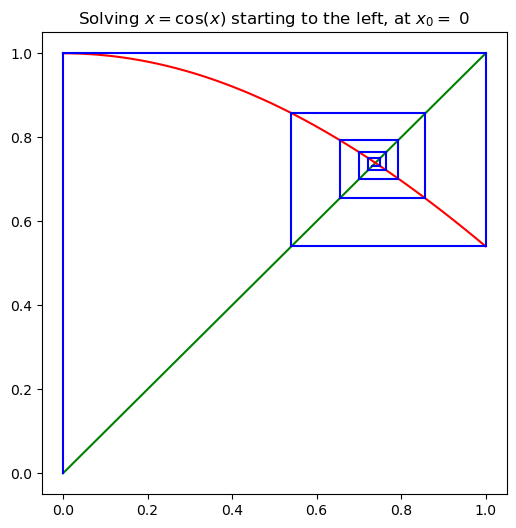

x_2 = 1.0
x_3 = 0.5403023058681398
x_4 = 0.8575532158463934
x_5 = 0.6542897904977791
x_6 = 0.7934803587425656
x_7 = 0.7013687736227565
x_8 = 0.7639596829006542
x_9 = 0.7221024250267077
x_10 = 0.7504177617637605
x_11 = 0.7314040424225098


In [30]:
a = 0;
b = 1;
x = range(a, b, length=n_plot_points);
iterations = 10

# Start at left
x_k = a
figure(figsize=[6,6])
title(L"Solving $x = \cos(x)$ starting to the left, at $x_0 =$"*" $a")
plot(x, x, "g")
plot(x, g_1(x), "r")
for k in 1:iterations
    g_x_k = g_1(x_k)
    # Graph evalation of g(x_k) from x_k:
    plot([x_k, x_k], [x_k, g_1(x_k)], "b")
    x_k_plus_1 = g_1(x_k)
    #Connect to the new x_k on the line y = x:
    plot([x_k, g_1(x_k)], [x_k_plus_1, x_k_plus_1], "b")
    # Update names: the old x_k+1 is the new x_k
    x_k = x_k_plus_1
    println("x_$(k+1) = $x_k_plus_1")
end

x_2 = 0.5403023058681398


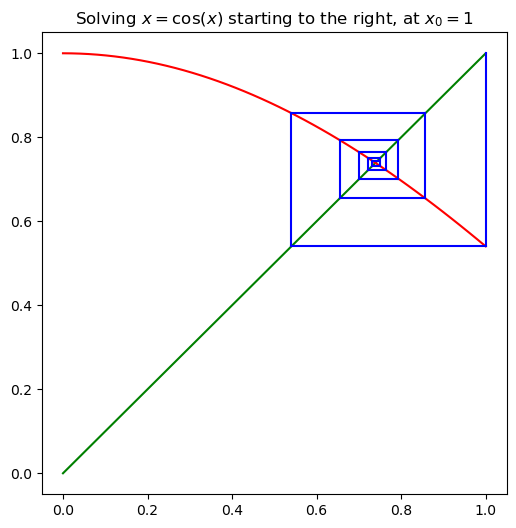

x_3 = 0.8575532158463934
x_4 = 0.6542897904977791
x_5 = 0.7934803587425656
x_6 = 0.7013687736227565
x_7 = 0.7639596829006542
x_8 = 0.7221024250267077
x_9 = 0.7504177617637605
x_10 = 0.7314040424225098
x_11 = 0.744237354900557


In [31]:
# Start at right
x_k = b
figure(figsize=[6,6])
title("Solving "*L"x = \cos(x)"*" starting to the right, at "*L"x_0 = "*"$b")
plot(x, x, "g")
plot(x, g_1(x), "r")
for k in 1:iterations
    g_x_k = g_1(x_k)
    # Graph evalation of g(x_k) from x_k:
    plot([x_k, x_k], [x_k, g_1(x_k)], "b")
    x_k_plus_1 = g_1(x_k)
    #Connect to the new x_k on the line y = x:
    plot([x_k, g_1(x_k)], [x_k_plus_1, x_k_plus_1], "b")
    # Update names: the old x_k+1 is the new x_k
    x_k = x_k_plus_1
    println("x_$(k+1) = $x_k_plus_1")
end

In each case, one gets a "box spiral" in to the fixed point.
It always looks like this when $g$ is *decreasing* near the fixed point.

If instead $g$ is *increasing* near the fixed point, the iterates approach monotonically, either from above or below:

### Example 4. Solving $f(x) = x^2 - 5x + 4 = 0$ in interval $[0, 3]$

The roots are 1 and 4; for now we aim at the first of these,
so we chose a domain $[0, 3]$ that contains just this root.

Let us get a fixed point for by "partially solving for $x$": solving for the $x$ in the $5 x$ term:

$$x = g(x) = (x^2 + 4)/5$$

In [32]:
function f_2(x)
    return x^2 - 5*x + 4
end;

In [33]:
function g_2(x)
    return (x^2 + 4)/5
end;

In [34]:
a = 0;
b = 3;
x = range(a, b, length=n_plot_points);

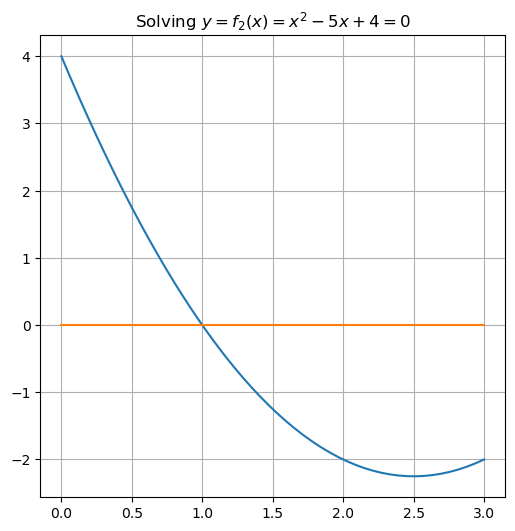

In [35]:
figure(figsize=[6,6])
title(L"Solving $y = f_2(x) = x^2-5x+4 = 0$")
plot(x, f_2.(x))
plot([a, b], [0, 0])
grid(true)

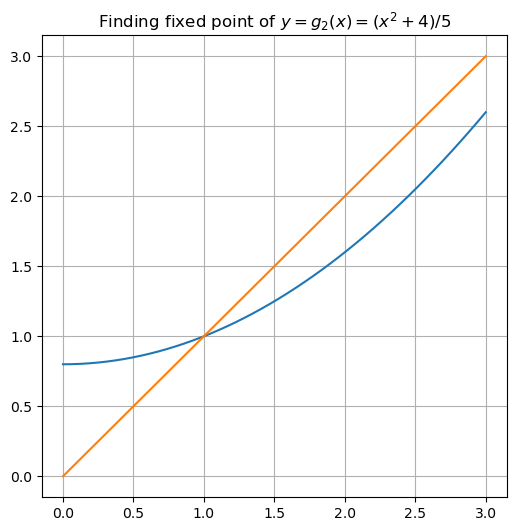

In [36]:
figure(figsize=[6,6])
title(L"Finding fixed point of $y = g_2(x) = (x^2 + 4)/5$")
plot(x, g_2.(x))
plot(x, x)
grid(true)

In [37]:
iterations = 10;
# Start at left
a = 0;
b = 1.5;
x = range(a, b, length=n_plot_points);

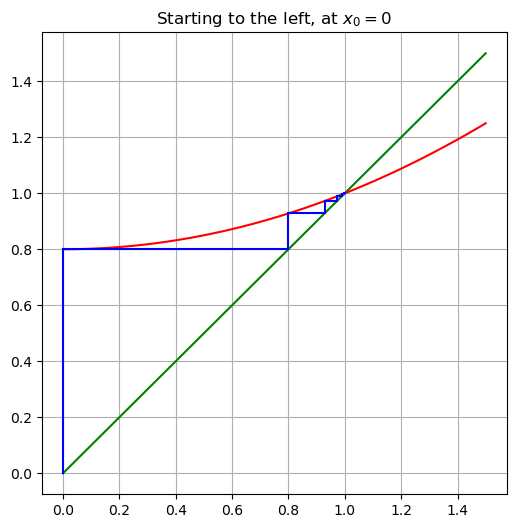

x_2 = 0.8
x_3 = 0.9280000000000002
x_4 = 0.9722368000000001
x_5 = 0.9890488790548482
x_6 = 0.9956435370319303
x_7 = 0.9982612105666906
x_8 = 0.9993050889044148
x_9 = 0.999722132142052
x_10 = 0.9998888682989302
x_11 = 0.999955549789623


In [38]:
x_k = a
figure(figsize=[6,6])
title(L"Starting to the left, at $x_0 =$"*"$a")
grid(true)
plot(x, x, "g")
plot(x, g_2.(x), "r")
for k in 1:iterations
    g_x_k = g_2(x_k)
    # Graph evalation of g(x_k) from x_k:
    plot([x_k, x_k], [x_k, g_2(x_k)], "b")
    x_k_plus_1 = g_2(x_k)
    #Connect to the new x_k on the line y = x:
    plot([x_k, g_2(x_k)], [x_k_plus_1, x_k_plus_1], "b")
    # Update names: the old x_k+1 is the new x_k
    x_k = x_k_plus_1
    println("x_$(k+1) = $x_k_plus_1")
end;

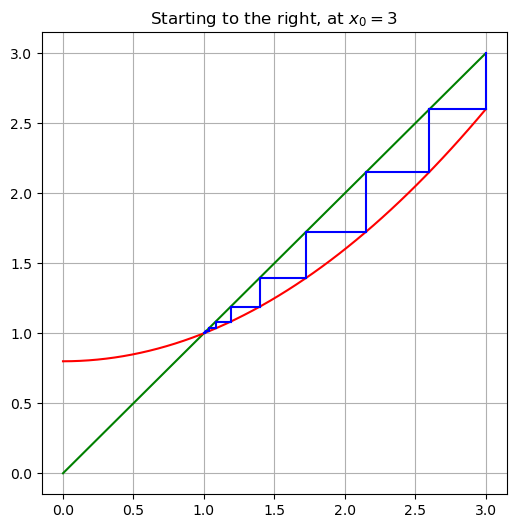

x_1 = 2.6
x_2 = 2.152
x_3 = 1.7262208
x_4 = 1.3959676500705283
x_5 = 1.1897451360086866
x_6 = 1.0830986977312658
x_7 = 1.0346205578054328
x_8 = 1.014087939726725
x_9 = 1.0056748698998388
x_10 = 1.0022763887896116


In [39]:
# Start at right
a = 0;
b = 3;
x = range(a, b, length=n_plot_points);
#println("Starting to the right, at x_0 = $b")
x_k = b;
figure(figsize=[6,6])
title(L"Starting to the right, at $x_0 =$"*"$b")
grid(true)
plot(x, x, "g")
plot(x, g_2.(x), "r")
#println("x_1 = $x_k")
for k in 1:iterations
    g_x_k = g_2(x_k)
    # Graph evalation of g(x_k) from x_k:
    plot([x_k, x_k], [x_k, g_2(x_k)], "b")
    x_k_plus_1 = g_2(x_k)
    #Connect to the new x_k on the line y = x:
    plot([x_k, g_2(x_k)], [x_k_plus_1, x_k_plus_1], "b")
    # Update names: the old x_k+1 is the new x_k
    x_k = x_k_plus_1
    println("x_$(k) = $x_k")
end;

---

This work is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)